# WELCOME TO SOUNDERPY!
## THE VERTICAL PROFILE DATA RETRIEVAL TOOL FOR PYTHON

----------------------

In [1]:
# first, import sounderpy! Its fun to import as 'spy'!
import sounderpy as spy


## ------------------ VERTICAL PROFILE DATA RETRIEVAL TOOL ------------------------ ##
##                   v2.0.5 | Sept 2023 | By Kyle J Gillett                         ##
##        RAOB, IGRA, RAP, RUC, NCEP, ERA5, RAP-ANALYSIS, BUFKIT & ACARS DATA       ##
## -------------------- THANK YOU FOR USING THIS PACKAGE -------------------------- ##



## UNDERSTANDING SOUNDERPY FUNCTIONALITY
-------
### `get_bufkit_data()`
    Access GFS, NAM, NAMNEST, RAP, HRRR, SREF, & HIRESW model forecast data 
### `get_model_data()`
    Access RAP, RUC, NCEP & ERA5 model reanalysis data 
### `get_obs_data()`
    Access RAOB & IGRAv2 observations
### `acars_data()`
    Access ACARS aircraft observations 

-----

## GETTING BUFKIT DATA

In [2]:
# to get bufkit data, we need to use the get_bufkit_data() function: 
# get_bufkit_data(model, station, fcst_hr, run_year, run_month, run_day, run_hour)

# THERE ARE TWO TYPES OF BUFKIT DATA WE CAN GET -- ARCHIVED FORECASTS & MOST RECENT FORECASTS 

# To get archived forecasts we need every kwarg.
# this will get us a 12z GFS forecast from 08/05/2023 at forecast hour 6 for KMOP
clean_data = spy.get_bufkit_data('GFS', 'KMOP', 6, '2023', '08', '05', '12')

# To get the most recent forecasts we use the same function, but we *don't need a year, month, day or hour!*
# You just need a model, station and forecast hour.
# This will get you the most recent run, at forecast hour 6, for KMOP.
clean_data = spy.get_bufkit_data('HRRR', 'KMOP', 6)

> BUFKIT DATA ACCESS FUNCTION --
---------------------------------
> COMPLETE --------
> RUNTIME: 00:00:01
> BUFKIT DATA ACCESS FUNCTION --
---------------------------------
> COMPLETE --------
> RUNTIME: 00:00:00


-----

## GETTING OBSERVED DATA

In [13]:
# to get observed data, we need to use the get_obs_data() function: 
# get_obs_data(station, year, month, day, hour)

# This function will get us a 12z RAOB for DTX on 08/05/2023
clean_data = spy.get_obs_data('DTX', '2023', '08', '05', '12')

-- OBSERVED DATA ACCESS FUNCTION --
-----------------------------------
FOUND RAOB: DTX on 08/05/2023 at 12z | From UW
RUNTIME: 00:00:02


_____


## GETTING REANALYSIS DATA

In [7]:
# To get reanalysis data from the ERA5, NCEP-FNL, RAP or RUC, we use
# `get_model_data(method, latlon, year, month, day, hour)`

# `method` is what str with the name of the model we want to use, 'era5', 'ncep', or 'rap-ruc'
# `latlon` is a list of a lat & lon point, such as: `[33.19, -87.46]`
# the 'date' kwargs are all str for the date & time that you want to 'reanalize'

# NOTE: to use ERA5 data, you must set up an account with the Climate Data Store @ https://cds.climate.copernicus.eu/api-how-to
# NOTE: *after using `get_model_data()`*, you must then use the `parse_data()` function to clean up the data

# this function will get us a *RAW* 15z ERA5 profile on 4/27/2011 at the point [33.19, -87.46]
raw_data = spy.get_model_data('era5', [33.19, -87.46], '2011', '04', '27', '22')

# you can run this for RAP-RUC and NCEP-FNL data:
#raw_data = spy.get_model_data('rap-ruc', [33.19, -87.46], '2011', '04', '27', '22')
#raw_data = spy.get_model_data('ncep', [33.19, -87.46], '2011', '04', '27', '22')

# now put it through the parse_data() function -- this is *ONLY NEEDED* after the get_model_data()
# this function will clean up the data for us and give us a *CLEAN* profile
clean_data = spy.parse_data(raw_data)

> ERA5 REANALYSIS DATA ACCESS FUNCTION --
------------------------------------------


2023-09-29 16:41:33,597 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-09-29 16:41:33,597 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-09-29 16:41:33,994 INFO Request is completed
INFO:cdsapi:Request is completed


> DATASET ACCESSED: reanalysis-era5-pressure-levels


2023-09-29 16:41:34,653 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-09-29 16:41:34,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-29 16:41:35,197 INFO Request is completed
INFO:cdsapi:Request is completed
2023-09-29 16:41:35,201 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data5/adaptor.mars.internal-1696020068.4081104-17381-7-237729b2-0c8e-4ddb-9f5f-8992e8bcf89c.nc to ./output.nc (10.7K)
INFO:cdsapi:Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data5/adaptor.mars.internal-1696020068.4081104-17381-7-237729b2-0c8e-4ddb-9f5f-8992e8bcf89c.nc to ./output.nc (10.7K)


> DATASET ACCESSED: reanalysis-era5-single-levels


2023-09-29 16:41:35,644 INFO Download rate 24.3K/s                                                                     
INFO:cdsapi:Download rate 24.3K/s
2023-09-29 16:41:35,648 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/adaptor.mars.internal-1696020073.704281-10146-19-353035de-b94e-47a8-881c-5c854e466368.nc to ./output.nc (3.3K)
INFO:cdsapi:Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/adaptor.mars.internal-1696020073.704281-10146-19-353035de-b94e-47a8-881c-5c854e466368.nc to ./output.nc (3.3K)
2023-09-29 16:41:35,824 INFO Download rate 19.2K/s                                                                     
INFO:cdsapi:Download rate 19.2K/s


> COMPLETE --------
> RUNTIME: 00:00:07
> ERA5 REANALYSIS DATA PARSE FUNCTION --
------------------------------------------
> COMPLETE --------
> RUNTIME: 00:00:00


C:\Users\kjgil\miniconda3\lib\site-packages\sounderpy\sounderpy.py:908: UserWarning: Relative humidity >120%, ensure proper units.
  'vert_Td': (mpcalc.dewpoint_from_relative_humidity(


## CHECK OUT THE DATA

In [8]:
clean_data

{'T': array([ 22.28674316,  22.43306876,  20.83852069,  19.93437478,
         21.04494596,  19.38638109,  17.26645068,  15.48649455,
         14.11005694,  12.71996237,  11.21351503,   9.47576544,
          7.73801584,   6.08559245,   4.45706804,   2.95472028,
          1.67737342,   0.40002656,  -1.2394994 ,  -2.98272998,
         -4.7270955 ,  -6.54850319,  -8.36991087, -10.18876606,
        -11.95425022, -13.71973437, -15.48521852, -17.20181558,
        -18.9087367 , -20.61565782, -22.29986191, -23.93686809,
        -25.57387426, -27.21088044, -28.85875909, -30.52030356,
        -32.18184802, -33.84339249, -35.52383079, -37.40439451,
        -39.28495823, -41.16552195, -43.04608567, -44.91727324,
        -46.71520775, -48.51314225, -50.32873394, -52.18056872,
        -54.0324035 , -55.90651413, -57.83550304, -59.76449196,
        -61.69348088, -63.42511199, -65.143216  , -66.86132   ,
        -68.24722928, -68.15021654, -68.05320379, -67.95619104,
        -67.8591783 , -68.48114955,

## NOW WE CAN MAKE A QUICK METPY PLOT!

> SOUNDING PLOTTER FUNCTION --
---------------------------------
> COMPLETE --------
> RUNTIME: 00:00:03


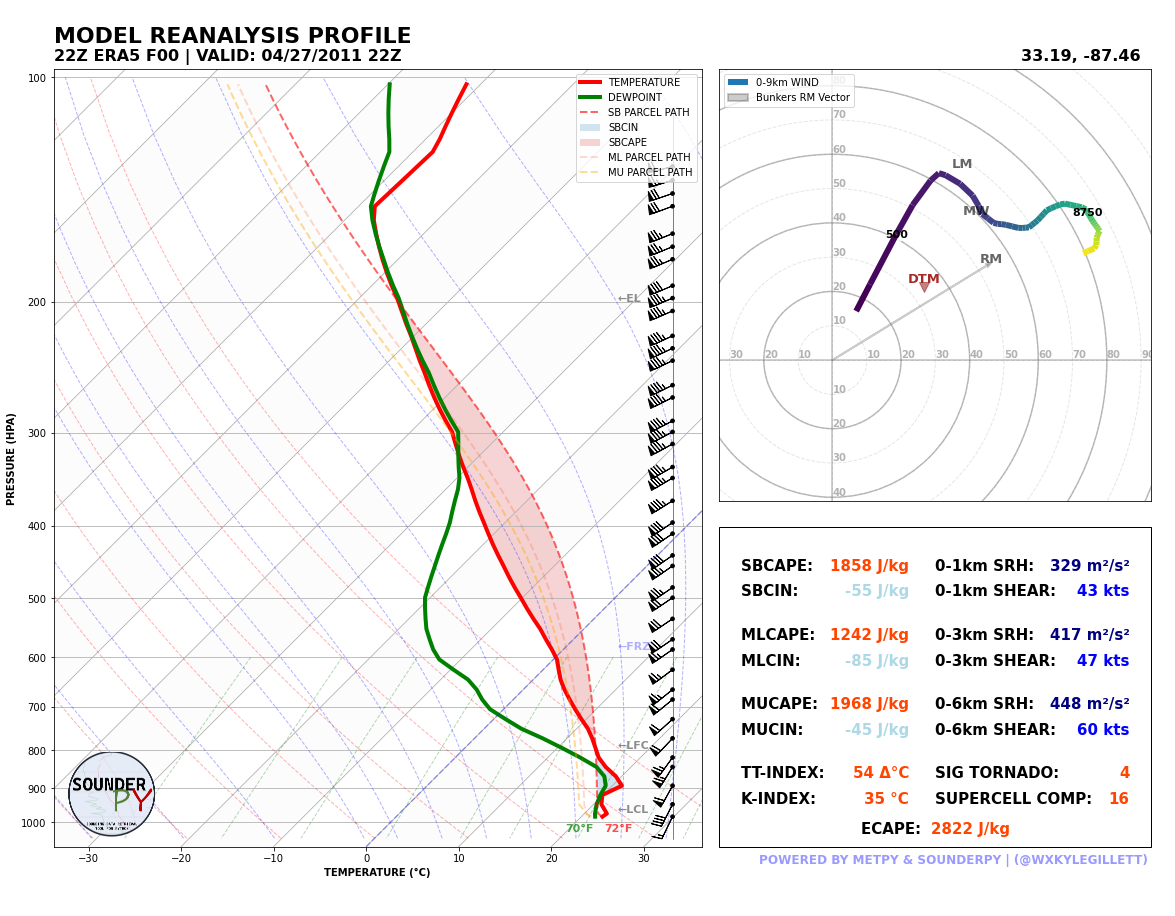

In [9]:
# we will use the 'show' kwarg here to plot it inline
# but you can also use 'save' and add an additional kwarg 'filename'
# to save the plot to a file!

# first here we can make a sounding! 
spy.metpy_sounding(clean_data, 'show')

> HODOGRAPH PLOTTER FUNCTION --
---------------------------------
> RUNTIME: 00:00:02


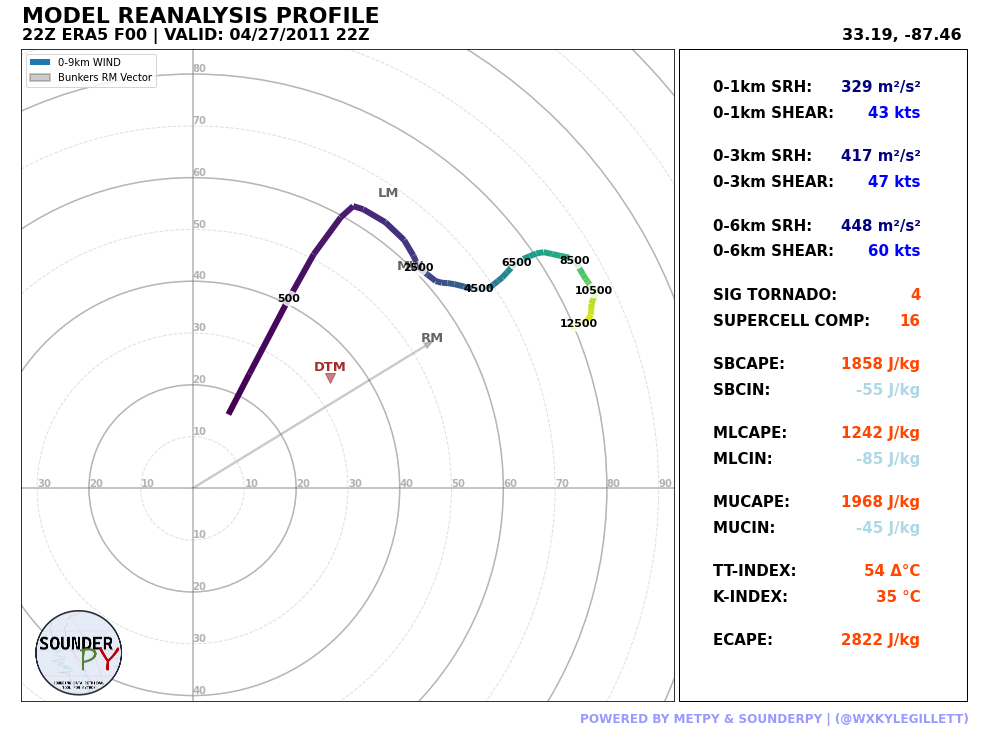

In [10]:
# and we can make a hodograph!
spy.metpy_hodograph(clean_data, 'show')

----

## SAVING PROFILE DATA TO A FILE

In [11]:
# SounderPy offers three ways to use this...

# you can save sounderpy data to a CSV, CM1 input file or a SHARPPY 'NSHARP' file
#spy.to_file('csv', clean_data)
#spy.to_file('cm1', clean_data)
#spy.to_file('sharppy', clean_data)

----

## FINDING LAT/LON PAIRS

In [ ]:
# SounderPy offers several ways to find latlons!

# you can find the lat/lon pair for any METAR, RAOB, IGRA, BUFKIT or Buoy site! 
# use the get_latlon() function:
spy.get_latlon('metar', 'KJXN')
spy.get_latlon('bufkit', 'KLAN')
spy.get_latlon('raob', 'DTX')